In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
import sys
import os
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pandas as pd

from sklearn.externals import joblib
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support 

from collections import OrderedDict
import pickle 
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.model_selection import train_test_split


%matplotlib inline

# paths###


In [31]:

data_dir = os.getenv('FINANCE_DATA')  # main directory referenced in all the code
findata_only = '/mnt/usb-Seagate_Expansion_Desk_NA8XEHR6-0:0-part2/FinData/'  # external date only drive
raw_crypto_data = '/mnt/usb-Seagate_Expansion_Desk_NA8XEHR6-0:0-part2/Data/crypto/LOB/BTCUSD.PERP.BMEX/'
csv_files=[s for s in os.listdir(raw_crypto_data) if s.endswith('.csv')]
# trades=[s for s in os.listdir(data_only_drive) if s.endswith('trades')]


In [12]:
csv_files_idx=1
# for csv_idx,_ in enumerate(csv_files):

csv_loc = "/".join((raw_crypto_data,csv_files[csv_files_idx]))
raw_data=pd.read_csv(csv_loc)

/home/ak/virtualenvs/DataAnalysis/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df_test=raw_data.head(5)
# raw_data['TimeStamp']=pd.to_datetime(raw_data['happened_at'], format='%M:%S.%f' )

In [24]:
from dateutil.parser import parse 

In [28]:
df_test['timestamp']=pd.to_datetime(df_test['happened_at'])

/home/ak/virtualenvs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_test['time']=df_test['timestamp'].dt.time
df_test['date']=df_test['timestamp'].dt.date

/home/ak/virtualenvs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ak/virtualenvs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
df_test['milliSeconds']=[int(((x.hour*60 + x.minute)*60 + x.second)*1000) for x in df_test['time']]

/home/ak/virtualenvs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_test.columns.values

array(['status', 'fair', 'happened_at', 'BIDPRC1', 'BIDSIZE1', 'ASKPRC1',
       'ASKSIZE1', 'BIDPRC2', 'BIDSIZE2', 'ASKPRC2', 'ASKSIZE2',
       'BIDPRC3', 'BIDSIZE3', 'ASKPRC3', 'ASKSIZE3', 'BIDPRC4',
       'BIDSIZE4', 'ASKPRC4', 'ASKSIZE4', 'BIDPRC5', 'BIDSIZE5',
       'ASKPRC5', 'ASKSIZE5', 'BIDPRC6', 'BIDSIZE6', 'ASKPRC6',
       'ASKSIZE6', 'timestamp', 'time', 'date', 'milliSeconds'],
      dtype=object)

In [43]:
df_2=pd.DataFrame()
df_2[['BID','BIDSIZE','ASK','ASKSIZE']]=df_test[['BIDPRC1', 'BIDSIZE1', 'ASKPRC1',
       'ASKSIZE1']]

In [45]:
df_2.drop('BID', axis=1, inplace=True)

In [50]:
csv_files=[s for s in os.listdir(raw_crypto_data) if s.endswith('.csv')]
# for csv_files_idx, csv_date in enumerate(csv_files):
csv_files_idx=1
csv_loc = "/".join((raw_crypto_data,csv_files[csv_files_idx]))
raw_data=pd.read_csv(csv_loc)


In [57]:
clean_df=pd.DataFrame()
clean_df[['happened_at','bestBidPrice','bestBidSize','bestAskPrice','bestAskSize']]=raw_data[['happened_at','BIDPRC1', 'BIDSIZE1', 'ASKPRC1',
       'ASKSIZE1']]


In [58]:
clean_df['timestamp']=pd.to_datetime(clean_df['happened_at'])
clean_df['time']=clean_df['timestamp'].dt.time
clean_df['date']=clean_df['timestamp'].dt.date
clean_df['milliSeconds']=[(((x.hour*60 + x.minute)*60 + x.second)*1000) for x in clean_df['time']]
clean_df.drop('happened_at', axis=1, inplace=True)

In [59]:
clean_df['duration']=clean_df.milliSeconds.diff(1)

In [60]:
clean_df['MicroPrice']=(clean_df['bestAskPrice']*clean_df['bestAskSize']+clean_df['bestBidPrice']*clean_df['bestBidSize'])/(clean_df['bestAskSize']+clean_df['bestBidSize'])

In [67]:
clean_df['MicroPriceReturns']=clean_df.MicroPrice.pct_change()
clean_df=clean_df.dropna()

/home/ak/virtualenvs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
clean_df.shape

(18811228, 11)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [2]:
def off_set(array_1, array_2):
    off_set= len(array_1)-len(array_2)
    return off_set

def simpleInputs(_X,_y):
    _offset =np.abs(off_set(_X,_y))
    if _offset==0:
        X = _X.as_matrix().astype(np.float)
        y=_y.astype(np.int)
    else:
        X= _X[:-_offset].as_matrix().astype(np.float)
        y = _y.astype(np.int)
    return X, y
def ensure_dir(file_path): #ensure a dictory exists otherwise create it
    if not os.path.exists(file_path):
        os.makedirs(file_path)
        print('New Directory Created',file_path)
    else:
        print('Directory Exists!check')


In [3]:
##useful functions##
def listdirs(folder): #return only directories from a master folder
    return [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]

In [10]:
symbols_ftse= ['DMG','ECM','CPG','BAR','STAN','LAN','SGE','SDR','SSE','BT.','CCL','WPP','AZN','KGF','ISF']
###ticker###
 #enter symbol you want - this will be made for various
for ticker in symbols_ftse:
    model_ticker_path =os.path.join(_models_+'/'+ticker)
    ensure_dir(model_ticker_path)
# os.listdir(model_ticker_path)


Directory Exists!check
Directory Exists!check
Directory Exists!check
('New Directory Created', '/home/ak/Documents/Data/features_models/models/BAR')
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check
Directory Exists!check


In [11]:
os.path.join(_models_,ticker)

'/home/ak/Documents/Data/features_models/models/ISF'

In [13]:
###############
with open(_pkl_path + ticker+'_features.pickle', 'rb') as handle:
    ticker_features_ = pickle.load(handle)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   


In [ ]:
X.shape[1]

In [54]:
def to_table(report): 
    report = report.splitlines() 
    res = [] 
    res.append(['']+report[0].split()) 
    for row in report[2:-2]: 
        res.append(row.split()) 
        lr = report[-1].split() 
        res.append([' '.join(lr[:3])]+lr[3:]) 
        return np.array(res)

In [57]:
pd.DataFrame(to_table(class_report))

,0,1,2,3,4
0,,precision,recall,f1-score,support
1,-1,0.99,0.04,0.07,7081
2,avg / total,0.76,0.38,0.24,11058


[0.99, 0.04, 0.07]
[0.37, 1.0, 0.54]
plotMat: [[0.99, 0.04, 0.07], [0.37, 1.0, 0.54]]
support: [7081, 3977]


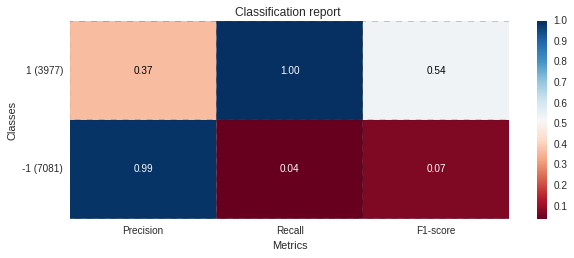

In [59]:
plot_classification_report(class_report)

In [80]:

import pandas as pd 

report = pd.DataFrame(list(precision_recall_fscore_support(y_cc, y_predict)), index=['Precision', 'Recall', 'F1-score', 'Support']).T # Now add the 'Avg/Total' row report.loc['Avg/Total', :] = precision_recall_fscore_support(y_true, y_test, average='weighted') report.loc['Avg/Total', 'Support'] = report['Support'].sum()


In [93]:

#Now add the 'Avg/Total' row 
report.loc['Avg/Total', :] = precision_recall_fscore_support(y_cc, y_predict, average='weighted') 

report.loc['Avg/Total', 'Support'] = report['Support'].sum()

type(report)
report.to_csv('/home/ak/Documents/'+'crap.csv')

In [94]:
os.getcwd()

'/home/ak/Documents/Research/QFPaper/aknotebooks'

In [95]:
pd.read_csv('/home/ak/Documents/'+'crap.csv')

,Unnamed: 0,Precision,Recall,F1-score,Support
0,0,0.985612,0.038695,0.074467,7081.0
1,1,0.368553,0.998994,0.538456,3977.0
2,Avg/Total,0.763687,0.384066,0.241340,11058.0


In [4]:
symbols_ftse= ['RB','CPI','AAL','CNA','VOD',
                'RSA','GKN','ECM','CRH','III','HSB','REL','PRU','RTO',
                'UU.','NG.','TSC','CEY','SBR','SDR','STAN','LAN']


In [52]:
ticker ='CPI'
ticker_predictions_path_ = os.path.join(_predictions_, ticker)
files_ =os.listdir(ticker_predictions_path_)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   
files_[0]
file_form=ticker+'_'+_dates[3]+'_class_report.csv'
_L=len(_dates)

In [53]:
results={'precision:':np.empty((_L,1))
    }
for _index, _value in enumerate(_dates):
    file_form=ticker+'_'+_dates[3]+'_class_report.csv'
    _df_=pd.read_csv(os.path.join(ticker_predictions_path_,file_form))
    results[_index, :]=_df_['Precision'][1]

TypeError: unhashable type

In [70]:
_df_['Precision'].to_dict()

{0: 0.7078792958927075, 1: 0.6896551724137931, 2: 0.7024686555058001}

In [71]:
_df_.to_dict()

{'F1-score': {0: 0.8271302644466211,
  1: 0.05361930294906166,
  2: 0.5974791839523146},
 'Precision': {0: 0.7078792958927075,
  1: 0.6896551724137931,
  2: 0.7024686555058001},
 'Recall': {0: 0.9946996466431096,
  1: 0.027894002789400282,
  2: 0.7076604554865424},
 'Support': {0: 1698.0, 1: 717.0, 2: 2415.0},
 'Unnamed: 0': {0: '0', 1: '1', 2: 'Avg/Total'}}

In [63]:
for row in reader:
    print row

In [5]:
ticker ='PRU'
###############
with open(_pkl_path + ticker+'_features.pickle', 'rb') as handle:
    ticker_features_ = pickle.load(handle)
with open(_pkl_path + ticker+'_labelled_data.pickle', 'rb') as handle:
    ticker_labelled_data_ = pickle.load(handle)
_dates = ticker_labelled_data_.keys()   

In [6]:
ticker_labelled_data_[_dates[1]].columns.values

array(['TradedTime', 'TradedPrice', 'Duration', 'ReturnTradedPrice',
       'label_control_chart_q_40_q_70_window_15',
       'label_simple_ep_window_20_thresh_0.05',
       'label_simple_ep_window_20_thresh_0.00'], dtype=object)

In [17]:
_y_=ticker_labelled_data_[_dates[1]]['label_control_chart_q_40_q_70_window_15']

In [18]:
_y_.unique()

array([1, 0])

In [24]:
ticker_features_[_dates[1]][0]

,fischer_score_dlambda,fischer_score_dsigma,fischer_score_dweight
868,8.540967,-6.476134e+02,-1.018436
869,11.316914,-7.160528e+02,0.218641
870,11.316914,-7.459808e+02,1.452236
871,27.880614,-2.083298e+03,15.087762
872,28.040853,-2.119577e+03,16.405925
873,28.040853,-2.149505e+03,17.639520
874,34.845980,-3.496391e+03,31.402463
875,35.078581,-3.535538e+03,32.758817
876,35.078581,-3.565466e+03,33.992411
877,40.913189,-4.913520e+03,47.770914


In [37]:
folder =os.path.join(_pkl_path,'models','DMG/')

In [43]:
test='20171025_svm_clf.pkl'
svm_clf_ = os.path.join(folder,str(test))


In [44]:
with open(svm_clf_, 'rb') as handle:
    estimator = pickle.load(handle)

In [4]:
_features_path='/home/ak/Documents/Data/features_models/features/'

In [45]:
list_=os.listdir(_features_path)

list_

['SYNT_2states20170605_features.pickle',
 'SYNT_2states20170607_features.pickle',
 'SYNT_2states20170602_features.pickle',
 'SYNT_2states20170601_features.pickle',
 'SYNT_2states20170606_features.pickle']

In [63]:
file_=list_[3]
synt_file_ = os.path.join(_features_path, file_)
synt_file_

'/home/ak/Documents/Data/features_models/features/SYNT_2states20170601_features.pickle'

In [64]:
with open(synt_file_, 'rb') as handle:
    synt_features_ = pickle.load(handle)

In [70]:
synt_features_[0]

,fischer_score_dlambda,fischer_score_dsigma,fischer_score_dweight
0,33.005566,-16.989929,-1.132597
1,45.008896,-45.582068,-2.506641
2,51.391444,-66.676951,-3.747624
3,65.134834,-66.531405,0.427045
4,81.934755,-66.554550,5.241577
5,92.254657,-80.434892,3.905963
6,85.494314,-75.340446,2.773064
7,101.641797,-106.096422,1.339792
8,114.525390,-105.457900,6.421884
9,130.764959,-105.619878,11.174159


In [75]:
a=synt_features_[1]
unique, counts = np.unique(a, return_counts=True)

In [74]:
a.isnull().sum()

fischer_score_dlambda    0
fischer_score_dsigma     0
fischer_score_dweight    0
dtype: int64

In [26]:
a.shape

(4876, 6)